# initial plotting

In [1]:
import xarray as xr
import ipywidgets as widgets
import numpy as np

import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs

## era5 precipitation data for june 2021

In [2]:
era5_prec_june_2021 = xr.open_dataset("./data/ERA5_REANALYSIS_precipitation_200306.nc")
print(era5_prec_june_2021)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2021-06-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-29 04:51:39 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...


In [3]:
print(era5_prec_june_2021['tp'])

<xarray.DataArray 'tp' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2021-06-01
Attributes:
    units:      m
    long_name:  Total precipitation


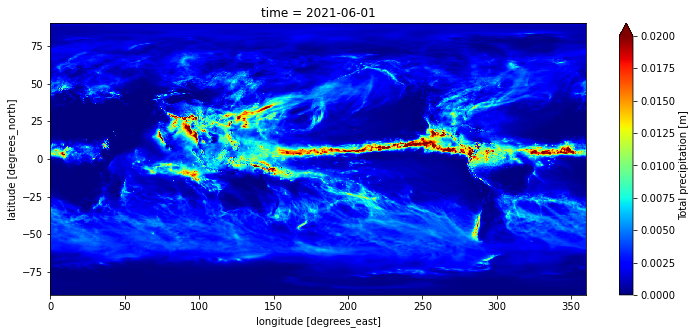

In [4]:
fig = plt.figure(figsize=[12,5])

#setting vmax to 0.02 to be able show a clearer gradient
era5_prec_june_2021['tp'].plot(cmap='jet', vmax=0.02)

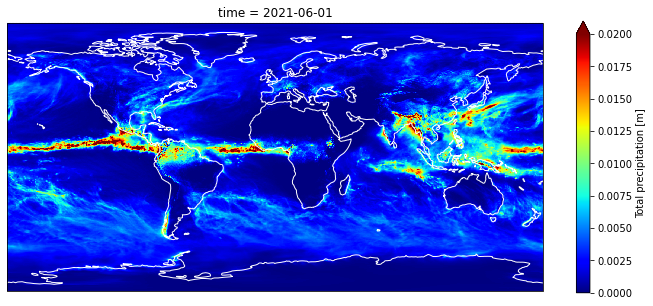

In [5]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

era5_prec_june_2021['tp'].plot(ax=ax, vmax=0.02, cmap='jet',
                   transform=ccrs.PlateCarree())

ax.coastlines(color="white", linewidth=1)

plt.show()

## era5 temperature data for june 2021

In [6]:
era5_temp_june_2021 = xr.open_dataset("./data/ERA5_REANALYSIS_air_temperature_200306.nc")
print(era5_temp_june_2021)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2021-06-01
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-29 20:37:22 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...


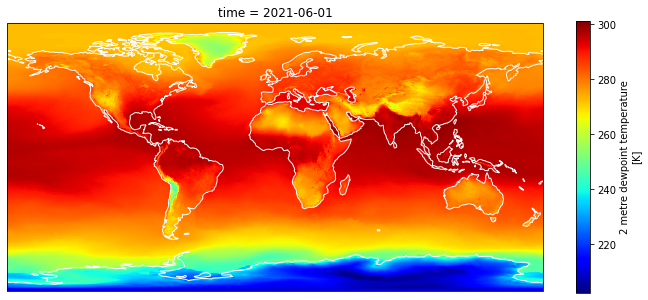

In [7]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

era5_temp_june_2021['d2m'].plot(cmap='jet', transform=ccrs.PlateCarree())

ax.coastlines(color="white")

plt.show()

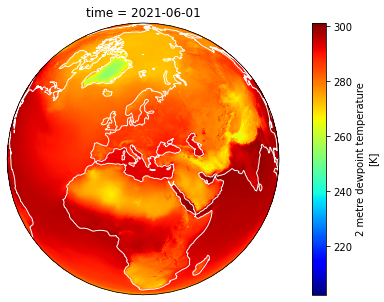

In [8]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=20, central_latitude=40))

era5_temp_june_2021['d2m'].plot(ax=ax, cmap='jet',
                   transform=ccrs.PlateCarree())

ax.coastlines(color="white")

plt.show()

## cmip5 precipitation data for 1850-2006

In [9]:
cmip5_prec_historical = xr.open_dataset("./data/pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc")
print(cmip5_prec_historical)

<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M mo

In [10]:
cmip5_prec_historical["pr"].data = cmip5_prec_historical["pr"].data * 86.4
cmip5_prec_historical["pr"].attrs["units"] = 'm/day' 

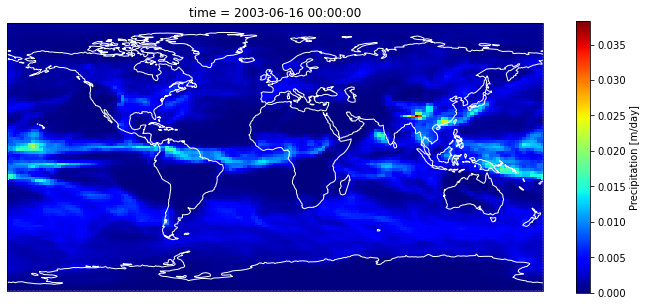

In [11]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

cmip5_prec_historical['pr'].sel(time='200306').plot(ax=ax, cmap='jet',
                   transform=ccrs.PlateCarree())

ax.coastlines(color="white")

plt.show()

In [12]:
select_date = widgets.Dropdown(
    options=cmip5_prec_historical.time.values.tolist(),
    rows=2,
    description='Date:',
    disabled=False
)

def generate_plot(date):
    
    fig = plt.figure(figsize=[12,5])

    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
    
    cmip5_prec_historical['pr'].sel(time=date).plot(cmap='jet', 
                                      transform=ccrs.PlateCarree())
    
    ax.coastlines(color='white', linewidth=1)

interact_plot = widgets.interact(generate_plot, date = select_date);

interactive(children=(Dropdown(description='Date:', options=(cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, h…

<Figure size 432x288 with 0 Axes>